# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston

import warnings
from warnings import filterwarnings

# 1.Problem Statement 

In [2]:
To predict Boston house price using various variables

SyntaxError: invalid syntax (<ipython-input-2-8dbc2686aae7>, line 1)

# 2.Data Gathering

In [ ]:
load_boston()

In [3]:
boston_data = load_boston()
dir(boston_data)

C:\Users\Bharat Aher\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [4]:
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['Target'] = boston_data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 3. Exploratory Data Analysis(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Linearity

In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Target        84.586724
dtype: float64

<AxesSubplot:>

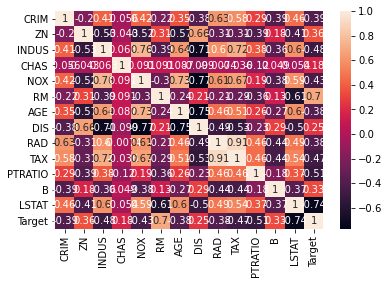

In [9]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:>

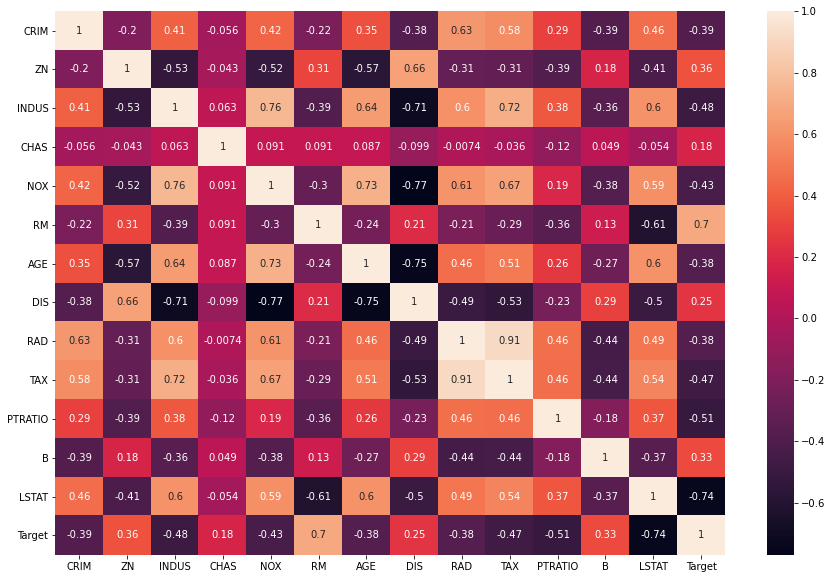

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

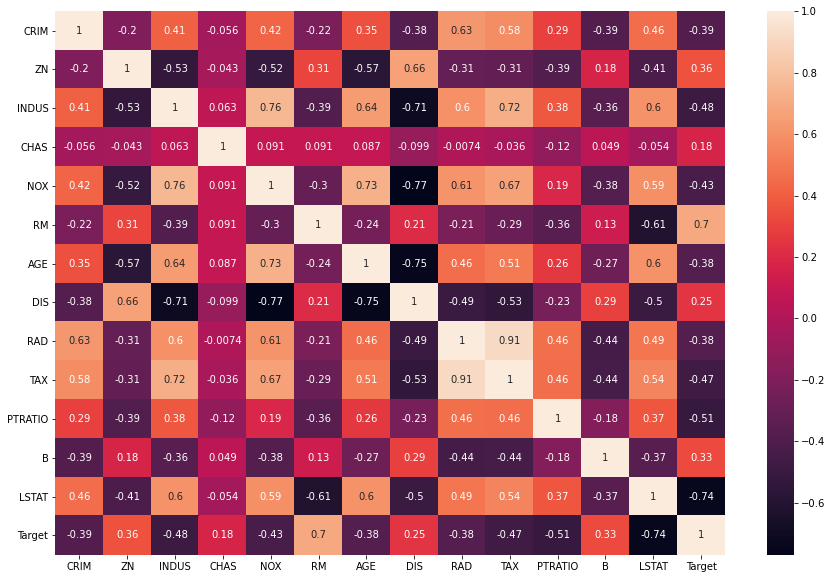

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig("Correlation.png")

In [12]:
df.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
Target,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


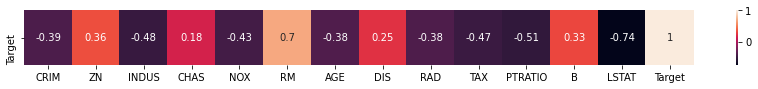

In [13]:
plt.figure(figsize=(15,1))
sns.heatmap(df.corr().tail(1),annot = True)
plt.savefig("Correlation_target.png")

## No Multicolinearity

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [15]:
df.shape

(506, 14)

In [16]:
df.shape[1]

14

In [17]:
df.to_numpy()

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:

for i in range(df.shape[1]-1):
    vif = variance_inflation_factor(df.to_numpy(),i)
    print("VIF is >>",vif)

VIF is >> 2.1314042398916406
VIF is >> 2.9100040831335887
VIF is >> 14.485874343285056
VIF is >> 1.176265953292883
VIF is >> 74.00426852716569
VIF is >> 136.1017425464841
VIF is >> 21.39886253165994
VIF is >> 15.430455486916713
VIF is >> 15.369979849775836
VIF is >> 61.93971317434026
VIF is >> 87.22723281176584
VIF is >> 21.35101506934191
VIF is >> 12.615187641345367


In [28]:
df.columns[0]

'CRIM'

In [29]:
df.columns[1]

'ZN'

In [20]:

for i in range(df.shape[1]-1): #i=0
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF is {df.columns[i]} >>",vif)

VIF is CRIM >> 2.1314042398916406
VIF is ZN >> 2.9100040831335887
VIF is INDUS >> 14.485874343285056
VIF is CHAS >> 1.176265953292883
VIF is NOX >> 74.00426852716569
VIF is RM >> 136.1017425464841
VIF is AGE >> 21.39886253165994
VIF is DIS >> 15.430455486916713
VIF is RAD >> 15.369979849775836
VIF is TAX >> 61.93971317434026
VIF is PTRATIO >> 87.22723281176584
VIF is B >> 21.35101506934191
VIF is LSTAT >> 12.615187641345367


In [21]:
vif_list = []


for i in range(df.shape[1]-1): #i=0
    vif = variance_inflation_factor(df.to_numpy(),i)
    print(f"VIF is {df.columns[i]} >>",vif)
    vif_list.append(vif)

VIF is CRIM >> 2.1314042398916406
VIF is ZN >> 2.9100040831335887
VIF is INDUS >> 14.485874343285056
VIF is CHAS >> 1.176265953292883
VIF is NOX >> 74.00426852716569
VIF is RM >> 136.1017425464841
VIF is AGE >> 21.39886253165994
VIF is DIS >> 15.430455486916713
VIF is RAD >> 15.369979849775836
VIF is TAX >> 61.93971317434026
VIF is PTRATIO >> 87.22723281176584
VIF is B >> 21.35101506934191
VIF is LSTAT >> 12.615187641345367


In [22]:
vif_list

[2.1314042398916406,
 2.9100040831335887,
 14.485874343285056,
 1.176265953292883,
 74.00426852716569,
 136.1017425464841,
 21.39886253165994,
 15.430455486916713,
 15.369979849775836,
 61.93971317434026,
 87.22723281176584,
 21.35101506934191,
 12.615187641345367]

In [23]:
x = df.drop('Target',axis=1)
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<AxesSubplot:>

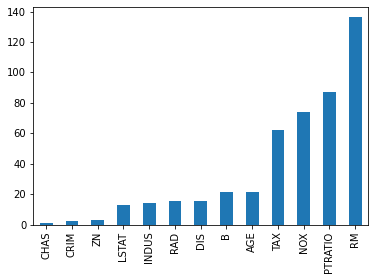

In [24]:
s1  = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind = 'bar')

<AxesSubplot:>

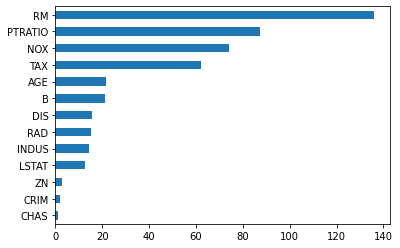

In [25]:
s1  = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind = 'barh')

## 4.Feature engineering

## 5.Feature Selection

## 6.Model Training

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
df.iloc[:,0:13] # Home work >> 13 col with all rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [29]:
column_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [30]:
df.loc[:,'CRIM':'LSTAT']

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Train test Split

In [31]:
x = df.drop('Target',axis=1)
y = df['Target']


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
476,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
145,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80


In [45]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
309,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
44,0.12269,0.0,6.91,0.0,0.448,6.069,40.0,5.7209,3.0,233.0,17.9,389.39,9.55
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,332.09,12.13
62,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64
153,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [46]:
y_test

413    16.3
220    26.7
309    20.3
44     21.2
474    13.8
       ... 
407    27.9
62     22.2
164    22.7
153    19.4
246    24.3
Name: Target, Length: 102, dtype: float64

In [47]:
lr_model = LinearRegression() # m and c

In [48]:
lr_model.fit(x_train,y_train)

LinearRegression()

### 7.Model Evaluation

In [49]:
y_pred = lr_model.predict(x_test)


In [50]:
y_pred[:5]

array([12.02005456, 33.59731701, 24.15345499, 23.12204607, 16.63742844])

In [51]:
y_test[:5]

413    16.3
220    26.7
309    20.3
44     21.2
474    13.8
Name: Target, dtype: float64

In [52]:
df.loc[259]

CRIM         0.65665
ZN          20.00000
INDUS        3.97000
CHAS         0.00000
NOX          0.64700
RM           6.84200
AGE        100.00000
DIS          2.01070
RAD          5.00000
TAX        264.00000
PTRATIO     13.00000
B          391.93000
LSTAT        6.90000
Target      30.10000
Name: 259, dtype: float64

In [53]:
lr_model.coef_

array([-1.13986167e-01,  4.88495382e-02, -2.12370558e-02,  2.86753481e+00,
       -1.73348850e+01,  3.13547503e+00,  7.00586852e-03, -1.58298408e+00,
        3.29969560e-01, -1.41516872e-02, -9.47891061e-01,  1.03613122e-02,
       -5.59977515e-01])

In [54]:
lr_model.intercept_

41.38334681760654

## Evalaution on Testing Data

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [56]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared error: ',mse)
print("*"*80)

rmse = np.sqrt(mse)
print("RMSE:",rmse)
print("*"*80)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("*"*80)

r_squared = r2_score(y_test,y_pred)
print("R Squared Value:",r_squared)

Mean Squared error:  17.74628340612071
********************************************************************************
RMSE: 4.212633784952201
********************************************************************************
MAE: 3.02969854336225
********************************************************************************
R Squared Value: 0.7455935591087497


In [57]:
r_squared = lr_model.score(x_test,y_test) #>> r2 value
print('R_squared_Value:',r_squared)

R_squared_Value: 0.7455935591087497


### Evalation on Training data

In [60]:
y_pred_train = lr_model.predict(x_train)
# len(y_pred_train)

y_pred_train[:5]

array([19.02996825, 17.03241834,  7.44931946, 24.59715695, 23.71681215])

In [62]:
y_train[:5]

396    12.5
495    23.1
489     7.0
375    15.0
73     23.4
Name: Target, dtype: float64

In [63]:
mse = mean_squared_error(y_train,y_pred_train)
print('Mean Squared error: ',mse)
print("*"*80)

rmse = np.sqrt(mse)
print("RMSE:",rmse)
print("*"*80)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("*"*80)

r_squared = r2_score(y_train,y_pred_train)
print("R Squared Value:",r_squared)

Mean Squared error:  23.193710358646435
********************************************************************************
RMSE: 4.815984879403842
********************************************************************************
MAE: 3.39085093314963
********************************************************************************
R Squared Value: 0.7367865283960853


In [64]:
row_12 = x_train.iloc[12]
row_12

CRIM        20.7162
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6590
RM           4.1380
AGE        100.0000
DIS          1.1781
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          370.2200
LSTAT       23.3400
Name: 406, dtype: float64

In [65]:
lr_model.predict([row_12])

C:\Users\Bharat Aher\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.13711178])

In [69]:
y_train.iloc[12]

11.9

### Assumptions of Linear Regression

In [ ]:
1.Linearity
2.No Multicolinearity


### 3. Normality of Residuals

In [ ]:
Residual values shouldbe normally distributed

Residual = (Ya - Yp)

Residual can be positive or negative

How to check Naormality:
    1.Visualation tools (Matplotlib and Seaborn):
        1.kdeplot
        2.histplot
        
    2.Hypothesis Testing:
        1.Shapiro test
        2.kstest
        3.normal test
        
    3.QQ plot
    
    4.Skewness of Residual

In [70]:
y_train[:5]

396    12.5
495    23.1
489     7.0
375    15.0
73     23.4
Name: Target, dtype: float64

In [71]:
y_pred_train[:5]

array([19.02996825, 17.03241834,  7.44931946, 24.59715695, 23.71681215])

In [72]:
y_train[:5] - y_pred_train[:5]

396   -6.529968
495    6.067582
489   -0.449319
375   -9.597157
73    -0.316812
Name: Target, dtype: float64

In [74]:
y_train - y_pred_train

396   -6.529968
495    6.067582
489   -0.449319
375   -9.597157
73    -0.316812
         ...   
427   -2.495243
110    0.914669
476   -3.428701
145    2.290816
266   -0.767989
Name: Target, Length: 404, dtype: float64

In [75]:
mse = (((y_train - y_pred_train) ** 2).sum())/404
mse

23.193710358646435

In [76]:
residuals  = y_train - y_pred_train
residuals

396   -6.529968
495    6.067582
489   -0.449319
375   -9.597157
73    -0.316812
         ...   
427   -2.495243
110    0.914669
476   -3.428701
145    2.290816
266   -0.767989
Name: Target, Length: 404, dtype: float64

# 1.kdeplot

<AxesSubplot:xlabel='Target', ylabel='Density'>

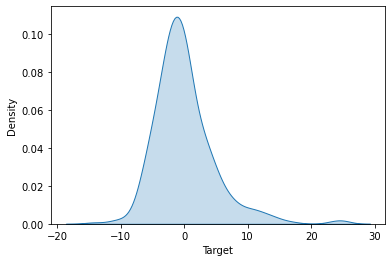

In [78]:
sns.kdeplot(residuals,fill = True)

## 2.histplot

<AxesSubplot:xlabel='Target', ylabel='Count'>

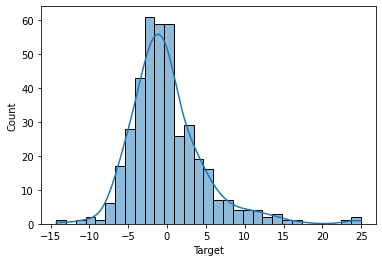

In [80]:
sns.histplot(residuals,kde = True)

# 3.QQ plot

In [81]:
import statsmodels.api as sm

In [82]:
residuals

396   -6.529968
495    6.067582
489   -0.449319
375   -9.597157
73    -0.316812
         ...   
427   -2.495243
110    0.914669
476   -3.428701
145    2.290816
266   -0.767989
Name: Target, Length: 404, dtype: float64

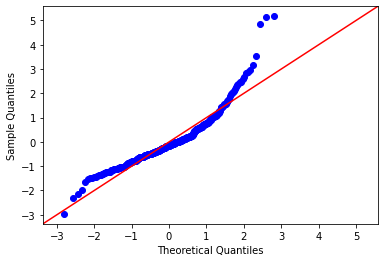

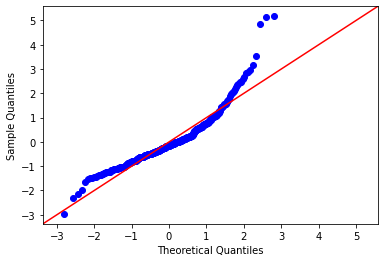

In [85]:
sm.qqplot(residuals,line='45',fit = True)

<AxesSubplot:ylabel='Count'>

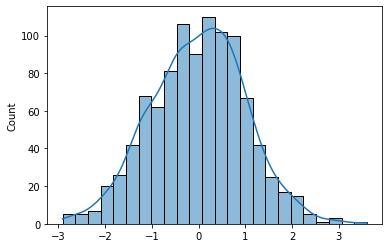

In [87]:
array = np.random.randn(1000)
sns.histplot(array,kde=True)

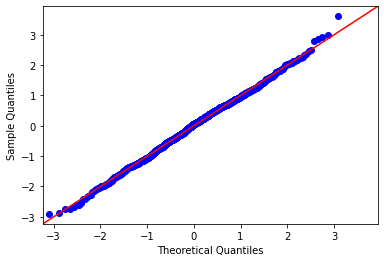

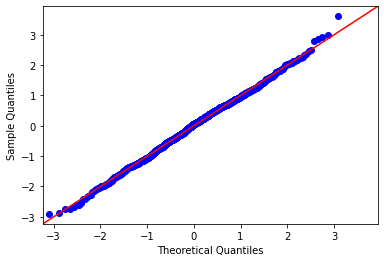

In [88]:
sm.qqplot(array,line='45',fit=True)

# Skewness

In [ ]:
Positive Skewness >> Tail of the distribution is longer towards the right hand side

Negative Skewness >> Tail of the distribution is longer towards the left hand side


-0.5 to +0.5 >> Symmetric Distribution  (0.05,-0.05,-0.3,0,0.07,0.4,0.3)
-1 to -0.5   >> Negative Skewed Data    (-0.6,-0,7,-0.9)
0.5 to +1.0  >> Postive Skewed Data     (0.6,0.9,0.8)


skew > 1.0  : Highly Positively Skewed Data (1.45,1.8,.)
skew < -1.0 : Highly Negatively Skewd Data  (-1.45,-1.8)
    

Mean > Median > Mode  >>> Positively Skewed Data
Mean < Median < Mode  >>> Negatively Skewed Data

In [90]:
residuals.skew()

1.5307855229108396

In [91]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [93]:
df['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [94]:
df['AGE'].skew()

-0.5989626398812962

<AxesSubplot:xlabel='AGE', ylabel='Density'>

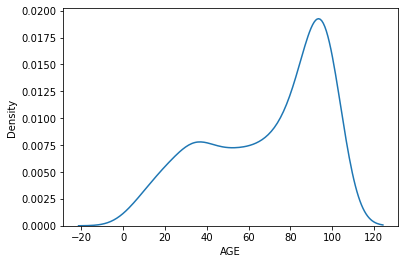

In [95]:
sns.kdeplot(df['AGE'])

In [97]:
df['LSTAT'].skew()

0.9064600935915367

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

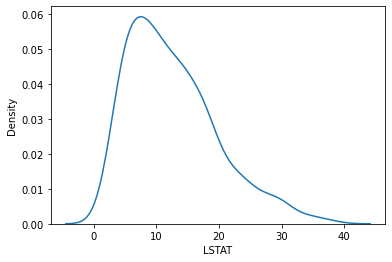

In [96]:
sns.kdeplot(df['LSTAT'])

In [98]:
df['LSTAT']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

In [99]:
mean = df['LSTAT'].mean()
print("Mean:",mean)

median = df['LSTAT'].median()
print("median:",median) 

Mode = df['LSTAT'].mode()[0]
print("Mode:",Mode)

#Mean > Meaidan > Mode >>> Postive Skewness

Mean: 12.653063241106723
median: 11.36
Mode: 6.36


In [100]:
mean = df['AGE'].mean()
print("Mean:",mean)

median = df['AGE'].median()
print("median:",median) 

Mode = df['AGE'].mode()[0]
print("Mode:",Mode)

#Mean < Meaidan < Mode >>> Negatively Skewness

Mean: 68.57490118577078
median: 77.5
Mode: 100.0


## 4.Hypothesis Testing

In [ ]:
Hypothesis >> Indian will win


Null Hypothesis >> We are accepting Null hypothesis:
                    Null hypothesis is True


Alternate Hypothesis >> Null hypothesis is False
                        We are rejecting Null Hypothesis
                        We are accepting Alternate Hypothesis

In [ ]:
Null Hypothesis >> Data is Normally Distributed
Alternate Hypothesis >> Data is not Normally Distributed

p_val = 0 to 1

significant value = 0.05

p_val >= 0.05 : Null hypothesis is True
p_val < 0.05  : Null hypothesis is False or Alternate Hypo. is True
    
    
p_val >= 0.05 :  Data is Normally Distributed
p_val < 0.05  :  Data is not Normally Distributed

In [ ]:
1. Shapiro test
2. kstest
3. normal test

## 1. Shapiro test

In [101]:
from scipy.stats import shapiro

In [103]:
stats, p_val = shapiro(df['AGE'])

In [104]:
p_val

2.230570069931666e-18

In [105]:
if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

Data is not Normally Distributed
Null Hypo. is False
Alternate Hypo. is True


In [106]:
stats, p_val = shapiro(df['LSTAT'])

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

Data is not Normally Distributed
Null Hypo. is False
Alternate Hypo. is True


In [107]:
stats, p_val = shapiro(array)
print("P_Val: ",p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

P_Val:  0.39741626381874084
Data is Normally Distributed
Null Hypo. is True


## 2.kstest

In [ ]:
Kolmogorov-Smirnov

In [109]:
from scipy.stats import kstest

In [112]:
kstest(df['AGE'],'norm')

KstestResult(statistic=0.998134186699616, pvalue=0.0)

In [113]:
stats, p_val = kstest(df['AGE'],'norm')
print("P_Val: ",p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

P_Val:  0.0
Data is not Normally Distributed
Null Hypo. is False
Alternate Hypo. is True


In [114]:
stats, p_val = kstest(array,'norm')
print("P_Val: ",p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

P_Val:  0.5887078705735181
Data is Normally Distributed
Null Hypo. is True


### 3.Normal test

In [115]:
from scipy.stats import normaltest

In [116]:
stats, p_val = normaltest(df['AGE'])
print("P_Val: ",p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

P_Val:  1.6191768966045395e-25
Data is not Normally Distributed
Null Hypo. is False
Alternate Hypo. is True


In [117]:
stats, p_val = normaltest(array)
print("P_Val: ",p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

P_Val:  0.8797385747420174
Data is Normally Distributed
Null Hypo. is True


In [119]:
stats, p_val = normaltest(residuals)
print("P_Val: ",p_val)

if p_val >= 0.05:
    print("Data is Normally Distributed")
    print("Null Hypo. is True")
    
else:
    print('Data is not Normally Distributed')
    print("Null Hypo. is False")
    print("Alternate Hypo. is True")

P_Val:  1.3047662413562432e-31
Data is not Normally Distributed
Null Hypo. is False
Alternate Hypo. is True
